**Modulo 1: Python**
* Instructor: [Juan Maniglia](https://juanmaniglia.github.io)

# Parte 1.4: Manejo de archivos

Los archivos a menudo contienen los datos que usa para entrenar sus programas de IA. Una vez entrenados, sus modelos pueden usar datos en tiempo real para formar predicciones. Estas predicciones también pueden hacerse en los archivos. Independientemente de si está prediciendo o entrenando, el procesamiento de archivos es una habilidad vital para el profesional de la IA. 

TAquí hay muchos tipos diferentes de archivos que debe procesar como profesional de IA. Algunos de estos tipos de archivos se enumeran aquí:
* **CSV** .csv
* **Imagenes** .jpg .png ...
* **Texto** .txt
* **JSON** .json
* **H5** .h5 (Guardar modelos de ML)
* **Audio** .mp3 ....

Los datos pueden provenir de una variedad de fuentes. En esta clase, obtenemos datos de tres ubicaciones principales:

* **Tu disco duro** -  Este tipo de datos se almacena localmente y Python accede a ellos desde una ruta que se parece a: **C:\User\data\myfile.csv**
* **Internet** -  Este tipo de datos reside en la nube y Python accede a ellos desde una URL.
* **Google Drive (cloud)** - Si se utiliza Google CoLab, con el GoogleDrive se puede guardar y cargar algunos archivos de datos.

### Cargar un archivo CSV
Los programas de Python pueden leer archivos CSV con Pandas.

In [4]:
import pandas as pd

df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/iris.csv")

Ahora que los datos están cargados, puede mostrar las primeras cinco filas con este comando.

In [5]:
display(df[0:5])

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Leer (transmitir) un archivo CSV grande
Pandas leerá todo el archivo CSV en la memoria. Por lo general, esto está bien. Sin embargo, a veces es posible que desee "transmitir" un archivo enorme. Streaming le permite procesar este archivo un registro a la vez. Debido a que el programa no carga todos los datos en la memoria, puede manejar archivos de gran tamaño.

In [6]:
import csv
import urllib.request
import codecs
import numpy as np

url = "https://data.heatonresearch.com/data/t81-558/iris.csv"
urlstream = urllib.request.urlopen(url)
csvfile = csv.reader(codecs.iterdecode(urlstream, 'utf-8'))
next(csvfile) # Saltar fila de encabezado
sum = np.zeros(4)
count = 0

for line in csvfile:
    # Convierta cada fila en Numpy array
    line2 = np.array(line)[0:4].astype(float)
    
    # Si la línea tiene la longitud correcta (omita las líneas vacías), sino agregue
    if len(line2) == 4:
        sum += line2
        count += 1
        
# Calcule el promedio e imprima el promedio 
# de las 4 medidas del iris (características)
print(sum/count)

[5.84333333 3.05733333 3.758      1.19933333]


### Leer un archivo de texto

In [7]:
import urllib.request

url = "https://data.heatonresearch.com/data/t81-558/datasets/sonnet_18.txt"
with urllib.request.urlopen(url) as urlstream:
    for line in codecs.iterdecode(urlstream, 'utf-8'):
        print(line.rstrip())

Sonnet 18 original text
William Shakespeare

Shall I compare thee to a summer's day?
Thou art more lovely and more temperate:
Rough winds do shake the darling buds of May,
And summer's lease hath all too short a date:
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimm'd;
And every fair from fair sometime declines,
By chance or nature's changing course untrimm'd;
But thy eternal summer shall not fade
Nor lose possession of that fair thou owest;
Nor shall Death brag thou wander'st in his shade,
When in eternal lines to time thou growest:
So long as men can breathe or eyes can see,
So long lives this and this gives life to thee.


### Caragar una Imagen

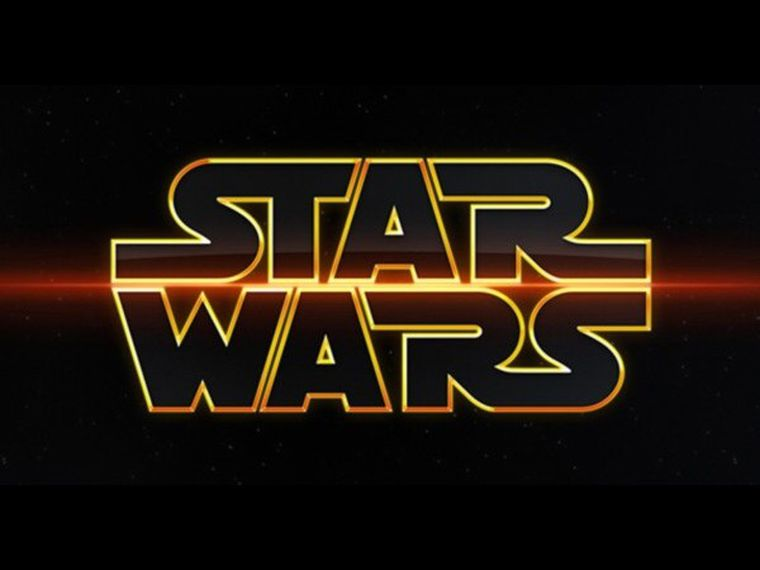

In [17]:
%matplotlib inline
from PIL import Image
import requests
from io import BytesIO

url = "https://estaticos.muyinteresante.es/media/cache/760x570_thumb/uploads/images/pyr/55673ed52a98bb41703ed903/dia-star-wars.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))

img